In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [9]:
import pickle as pk
import matplotlib.pyplot as plt

In [10]:
# import MLR input vars

# physical: note these are one time step
with open('phys_inputs_norm.p', 'rb') as f:
    Tn_south, Tn_east, Sn_south, Sn_east = pk.load(f)
    
# bio
with open('bio_inputs_norm.p', 'rb') as f:
    On_south, On_east, Nn_south, Nn_east = pk.load(f)

# Calculate DIC and TA

In [11]:
# DIC coefficients
a0 = 2099
a1 = -52.4
a2 = 34.7
a3 = -29.7
a4 = -3.29

# MLR equations
DIC_south = a0 + a1*Tn_south + a2*Sn_south + a3*On_south + a4*Tn_south*Sn_south
DIC_east = a0 + a1*Tn_east + a2*Sn_east + a3*On_east + a4*Tn_east*Sn_east

# TA coefficients
b0 = 2289
b1 = 71.2
b2 = 2.39

TA_south = b0 + b1*Sn_south + b2*On_south
TA_east = b0 + b1*Sn_east + b2*On_east

# plot DIC and TA to check

In [13]:
# import spatial vars

with open('BC_depth.p', 'rb') as f:
    depth_south, depth_east = pk.load(f)

with open('BC_coords.p', 'rb') as f:
    lon_south, lon_east, lat_south, lat_east = pk.load(f)

Text(0.5, 1.0, 'TA east')

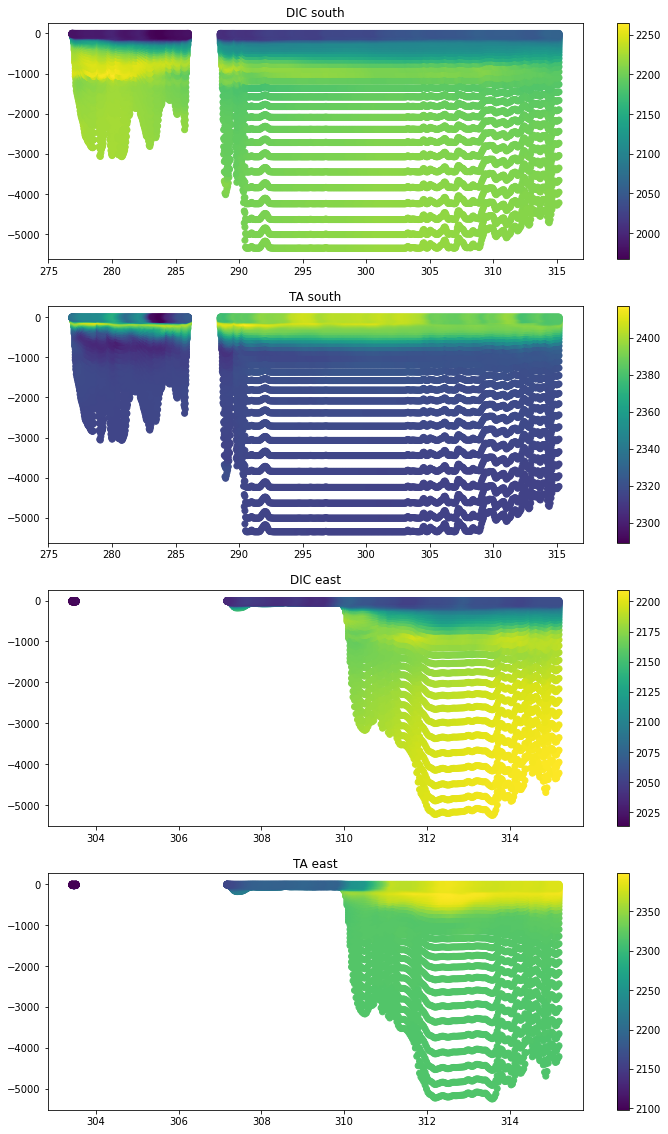

In [14]:
# combine plots as subplots
fig = plt.figure(figsize=(12,20))

ax = fig.add_subplot(411)
plt.scatter(lon_south, depth_south, marker='o', c=DIC_south)
plt.colorbar()
plt.title("DIC south")

ax = fig.add_subplot(412)
plt.scatter(lon_south, depth_south, marker='o', c=TA_south)
plt.colorbar()
plt.title("TA south")

ax = fig.add_subplot(413)
plt.scatter(lon_east, depth_east, marker='o', c=DIC_east)
plt.colorbar()
plt.title("DIC east")

ax=fig.add_subplot(414)
plt.scatter(lon_east, depth_east, marker='o', c=TA_east)
plt.colorbar()
plt.title("TA east")